In [388]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from esda.moran import Moran
from esda.geary import Geary
from esda.getisord import G, G_Local
from pysal.lib import weights
from splot.esda import moran_scatterplot
from libpysal.weights import DistanceBand
from libpysal.weights import KNN

Julia Pawluś, Kamil Sarzyniak, Piotr Stawarski
- Projekt 2 z przedmiotu Ekonometrii Przestrzennej

In [389]:
woj = pd.read_csv("przestepstwa.csv")
pow = pd.read_csv("przestepstwa_pow.csv")
#woj_map = "wojewodztwa.shp"
pow_map = "powiaty.shp"
#woj_m = gpd.read_file(woj_map)
pow_m = gpd.read_file(pow_map)

In [390]:
woj

,oid,kod KTS,województwo,powierzchnia,rok,TERYT,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
0,1,11200000000,małopolskie,15183.0,2020,12,69174.0
1,2,12400000000,śląskie,12333.0,2020,24,117632.0
2,3,20800000000,lubuskie,13988.0,2020,8,24531.0
3,4,23000000000,wielkopolskie,29826.0,2020,30,58900.0
4,5,23200000000,zachodniopomorskie,22905.0,2020,32,35325.0
5,6,30200000000,dolnośląskie,19947.0,2020,2,74802.0
6,7,31600000000,opolskie,9412.0,2020,16,15710.0
7,8,40400000000,kujawsko-pomorskie,17971.0,2020,4,37172.0
8,9,42200000000,pomorskie,18323.0,2020,22,49381.0
9,10,42800000000,warmińsko-mazurskie,24173.0,2020,28,26295.0


In [391]:
woj.drop(['oid', 'kod KTS', 'powierzchnia', 'rok', 'TERYT'], axis=1, inplace=True)
woj.rename(columns={'województwo': 'JPT_NAZWA_'}, inplace=True)
woj

,JPT_NAZWA_,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
0,małopolskie,69174.0
1,śląskie,117632.0
2,lubuskie,24531.0
3,wielkopolskie,58900.0
4,zachodniopomorskie,35325.0
5,dolnośląskie,74802.0
6,opolskie,15710.0
7,kujawsko-pomorskie,37172.0
8,pomorskie,49381.0
9,warmińsko-mazurskie,26295.0


In [392]:
woj.describe()

,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
count,16.000000
mean,47838.000000
std,31133.054732
min,15710.000000
25%,25854.000000
50%,36248.500000
75%,61468.500000
max,117632.000000


In [393]:
woj.dtypes

JPT_NAZWA_                                                                                                                                                 object
Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem    float64
dtype: object

In [394]:
pow

,oid,kod KTS,powiat,powierzchnia,rok,TERYT,Typ powiatu,TERYT województwa,Województwo,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych|ogółem
0,7,11212210000,nowosądecki,1549.0,2020,1210,powiat,12,małopolskie,11958.0
1,2,11212416000,tarnowski,1412.0,2020,1216,powiat,12,małopolskie,2860.0
2,5,20811301000,gorzowski,1214.0,2020,801,powiat,8,lubuskie,1108.0
3,40,23015810000,koniński,1578.0,2020,3010,powiat,30,wielkopolskie,1163.0
4,13,23016121000,poznański,1900.0,2020,3021,powiat,30,wielkopolskie,5260.0
5,14,23216309000,koszaliński,1653.0,2020,3209,powiat,32,zachodniopomorskie,881.0
6,15,23216403000,drawski,1764.0,2020,3203,powiat,32,zachodniopomorskie,1141.0
7,16,23216410000,myśliborski,1182.0,2020,3210,powiat,32,zachodniopomorskie,1307.0
8,17,23216417000,wałecki,1415.0,2020,3217,powiat,32,zachodniopomorskie,1096.0
9,19,30210302000,dzierżoniowski,479.0,2020,202,powiat,2,dolnośląskie,1638.0


In [395]:
pow.drop(['oid', 'kod KTS', 'Województwo', 'powierzchnia', 'rok', 'TERYT', 'Typ powiatu', 'TERYT województwa'], axis=1, inplace=True)
pow.rename(columns={'powiat': 'JPT_NAZWA_'}, inplace=True)
pow.rename(columns={
    'Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych|ogółem': 'Przestępstwa_powiaty'
}, inplace=True)
pow

,JPT_NAZWA_,Przestępstwa_powiaty
0,nowosądecki,11958.0
1,tarnowski,2860.0
2,gorzowski,1108.0
3,koniński,1163.0
4,poznański,5260.0
5,koszaliński,881.0
6,drawski,1141.0
7,myśliborski,1307.0
8,wałecki,1096.0
9,dzierżoniowski,1638.0


In [396]:
pow.describe()

,Przestępstwa_powiaty
count,380.000000
mean,2014.231579
std,3182.327268
min,239.000000
25%,839.500000
50%,1271.500000
75%,2014.500000
max,45754.000000


<Axes: >

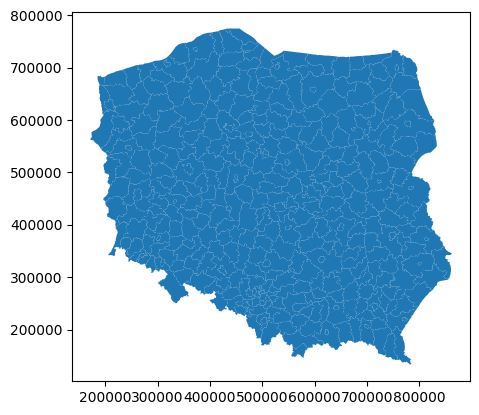

In [397]:
pow_m.plot(legend=True)

In [398]:
pow_m.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,JPT_NAZWA1,JPT_ORGAN1,JPT_WAZNA_,ID_BUFORA_,ID_BUFORA1,ID_TECHNIC,IIP_PRZEST,IIP_IDENTY,IIP_WERSJA,JPT_KJ_IIP,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry
0,None,POW,92617,1807,powiat krośnieński,None,13415,20210128,0,20170101,0,None,None,NZN,BRK,201859,0,1331302,PL.PZGIK.200,798ef296-2055-4890-993f-d414c67164ab,2021-01-28T13:43:40+01:00,EGIB,1807,None,None,UZG,0,1359583,0,None,0,0,3.11205337354,.12332626559,37044051900000,powiat,"POLYGON ((689863.285 218885.536, 689862.128 21..."
1,None,POW,141297,2804,powiat elbląski,None,13422,20210514,0,20120926,0,None,None,NZN,NZN,218263,0,829271,PL.PZGIK.200,61a0d267-58aa-4f3a-86e7-faa281e50ebc,2021-05-14T13:19:46+02:00,EGIB,2804,None,None,UZG,0,1360107,0,None,0,0,4.2521309989,.19417975633,17074769000000,powiat,"POLYGON ((551842.165 693417.652, 551870.912 69..."
2,None,POW,209827,1415,powiat ostrołęcki,None,13409,20210518,0,20120926,0,None,None,NZN,NZN,219096,0,829100,PL.PZGIK.200,d2f96418-0366-4f59-8793-fef1aa0ca19f,2021-05-18T08:56:02+02:00,EGIB,1415,None,None,UZG,0,1360143,0,None,0,0,5.31641009622,.28125317026,55066883500000,powiat,"POLYGON ((646230.458 617154.258, 646336.602 61..."
3,None,POW,79097,0413,powiat sępoleński,None,13424,20220112,0,20120926,0,None,None,NZN,NZN,253504,0,829353,PL.PZGIK.200,09447bc4-a3c3-4d84-83ab-d61a69820974,2022-01-12T10:03:23+01:00,EGIB,0413,None,None,UZG,0,1362180,0,None,0,0,2.00313300009,.10690160786,09235092600000,powiat,"POLYGON ((384997.245 615178.269, 385170.687 61..."
4,None,POW,126576,3019,powiat pilski,None,13417,20220112,0,20120926,0,None,None,NZN,NZN,253504,0,829157,PL.PZGIK.200,196c6cd5-4f8d-4e98-a653-e0a36ccac728,2022-01-12T10:03:23+01:00,EGIB,3019,None,None,UZG,0,1362184,0,None,0,0,4.17134504707,.17008216429,57079948000000,powiat,"POLYGON ((342585.53 579834.38, 342632.859 5798..."


In [399]:
pow_m['JPT_NAZWA_'] = pow_m['JPT_NAZWA_'].str.replace('powiat ', '', regex=False)

In [400]:
file_path = 'ludnosc.csv'


df = pd.read_csv(file_path)
df.columns = df.columns.str.strip() 


ludnosc_pow = pd.DataFrame({
    'JPT_NAZWA_': df['Powiaty'],
    'Ludnosc_powiaty': df['Ludnosc']
})


print(ludnosc_pow)

    JPT_NAZWA_                   Ludnosc_powiaty
0                 bolesławiecki    90103        
1                dzierżoniowski   100813        
2                     głogowski    89102        
3                      górowski    34870        
4                      jaworski    50116        
5                 jeleniogórski    63591        
6                kamiennogórski    43239        
7                       kłodzki   157996        
8                      legnicki    55166        
9                      lubański    54254        
10                     lubiński   106150        
11                     lwówecki    45925        
12                      milicki    36999        
13                    oleśnicki   107269        
14                      oławski    76752        
15                   polkowicki    63065        
16                  strzeliński    43570        
17                      średzki    55079        
18                    świdnicki   156921        
19                  

In [401]:
print(pow)

    JPT_NAZWA_                Przestępstwa_powiaty
0                nowosądecki  11958.0             
1                  tarnowski   2860.0             
2                  gorzowski   1108.0             
3                   koniński   1163.0             
4                  poznański   5260.0             
5                koszaliński    881.0             
6                    drawski   1141.0             
7                myśliborski   1307.0             
8                    wałecki   1096.0             
9             dzierżoniowski   1638.0             
10                ząbkowicki   1118.0             
11                włocławski   1022.0             
12                  bydgoski   1596.0             
13              Skierniewice   1015.0             
14            Biała Podlaska   1072.0             
15           Piekary Śląskie   8298.0             
16                nowotarski   2195.0             
17               białostocki   1847.0             
18                 łomżyński   

In [402]:
pow['JPT_NAZWA_'] = pow['JPT_NAZWA_'].str.strip()
ludnosc_pow['JPT_NAZWA_'] = ludnosc_pow['JPT_NAZWA_'].str.strip()

In [403]:
merged_df = pow.merge(ludnosc_pow, on='JPT_NAZWA_')

In [404]:
merged_df['Przestępstwa_średnia_powiaty'] = (merged_df['Przestępstwa_powiaty'] / merged_df['Ludnosc_powiaty'])

In [405]:
print(merged_df[['JPT_NAZWA_', 'Przestępstwa_powiaty', 'Ludnosc_powiaty', 'Przestępstwa_średnia_powiaty']])

    JPT_NAZWA_                Przestępstwa_powiaty  Ludnosc_powiaty  \
0                nowosądecki  11958.0                216796           
1                  tarnowski   2860.0                201497           
2                  gorzowski   1108.0                 71836           
3                   koniński   1163.0                130053           
4                  poznański   5260.0                399272           
5                koszaliński    881.0                 66480           
6                    drawski   1141.0                 57015           
7                myśliborski   1307.0                 65638           
8                    wałecki   1096.0                 53039           
9             dzierżoniowski   1638.0                100813           
10                ząbkowicki   1118.0                 64802           
11                włocławski   1022.0                 86037           
12                  bydgoski   1596.0                118683           
13    

In [406]:
pow = merged_df[['JPT_NAZWA_', 'Przestępstwa_średnia_powiaty']]
print(pow)

    JPT_NAZWA_                Przestępstwa_średnia_powiaty
0                nowosądecki  0.055158                    
1                  tarnowski  0.014194                    
2                  gorzowski  0.015424                    
3                   koniński  0.008943                    
4                  poznański  0.013174                    
5                koszaliński  0.013252                    
6                    drawski  0.020012                    
7                myśliborski  0.019912                    
8                    wałecki  0.020664                    
9             dzierżoniowski  0.016248                    
10                ząbkowicki  0.017253                    
11                włocławski  0.011879                    
12                  bydgoski  0.013448                    
13              Skierniewice  0.021107                    
14            Biała Podlaska  0.018751                    
15           Piekary Śląskie  0.150790                  

In [407]:
print(pow.sort_values(by='Przestępstwa_średnia_powiaty', ascending=False))

    JPT_NAZWA_                Przestępstwa_średnia_powiaty
42                    Krosno  0.182498                    
15           Piekary Śląskie  0.150790                    
37               Ruda Śląska  0.091868                    
229                  gdański  0.055558                    
0                nowosądecki  0.055158                    
75                   bielski  0.050522                    
366              nowodworski  0.049241                    
184                świdnicki  0.046604                    
118                    Sopot  0.045830                    
381                Ostrołęka  0.044760                    
181                  Legnica  0.044670                    
175             Jelenia Góra  0.042802                    
290             jędrzejowski  0.042317                    
154             choszczeński  0.041250                    
90                 będziński  0.040590                    
173              zgorzelecki  0.038839                  

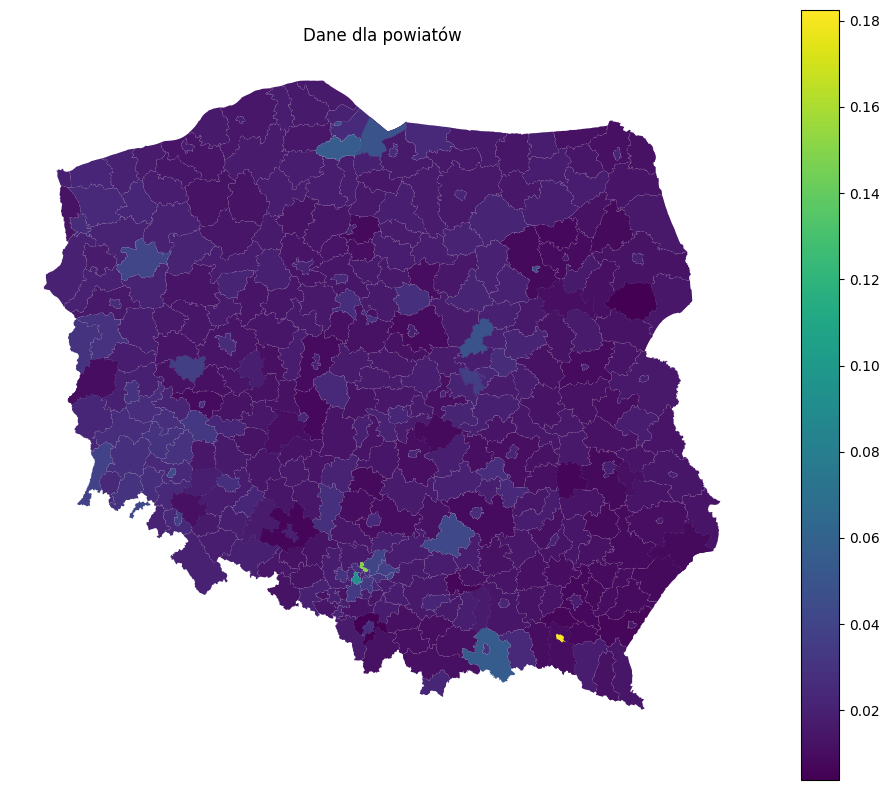

In [408]:
merged_pow = pow_m.merge(pow, on='JPT_NAZWA_')

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_pow.plot(column='Przestępstwa_średnia_powiaty',
               ax=ax,
               legend=True)
ax.set_axis_off()
plt.title('Dane dla powiatów')
plt.show()

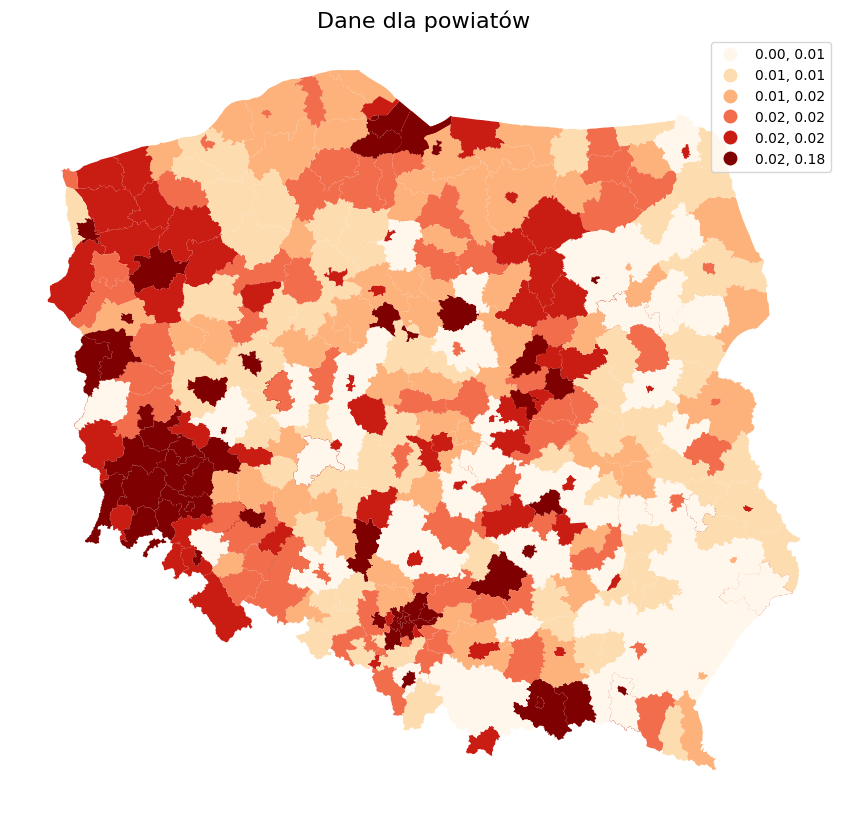

In [409]:
from mapclassify import classify
import matplotlib.pyplot as plt

merged_pow = pow_m.merge(pow, on='JPT_NAZWA_')

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_pow.plot(column='Przestępstwa_średnia_powiaty',
                scheme='Quantiles',  # Możesz wypróbować również 'EqualInterval' lub 'NaturalBreaks'
                k=6,  # Liczba klas (np. 6)
                cmap='OrRd',  # Kolorystyka mapy
                ax=ax,
                legend=True)

ax.set_axis_off()
plt.title('Dane dla powiatów', fontsize=16)
plt.show()

In [410]:
#Analizy przy użyciu wag binarnego sąsiedztwa

In [411]:
data_column = 'Przestępstwa_średnia_powiaty'

w = weights.Queen.from_dataframe(merged_pow)
w.transform = 'r'

C:\Users\xjulc\AppData\Local\Temp\ipykernel_60000\401519068.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(merged_pow)


('WARNING: ', 254, ' is an island (no neighbors)')


c:\Python310\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 254.
  W.__init__(self, neighbors, ids=ids, **kw)


In [412]:
y = merged_pow[data_column]
moran_pow = Moran(y, w)
print("Moran's I:", moran_pow.I)           # Wartość statystyki Moran's I
print("E(I):", moran_pow.EI)               # Wartość oczekiwana E(I)
print("Var(I):", moran_pow.VI_norm)         # Wariancja Var(I)
print("Z(I):", moran_pow.z_norm)            # Statystyka Z(I)
print("p-value:", moran_pow.p_norm)         # Wartość p

Moran's I: 0.09657896342641319
E(I): -0.00228310502283105
Var(I): 0.0008340830568668548
Z(I): 3.423143009567179
p-value: 0.0006190150114729597


In [413]:
geary_pow = Geary(y, w)
print("Geary's C:", geary_pow.C)           
print("E(C):", geary_pow.EC)              
print("Var(C):", geary_pow.VC_norm)            
print("Z(C):", geary_pow.z_norm)               
print("p-value:", geary_pow.p_norm)         

Geary's C: 0.8083744371413427
E(C): 1.0
Var(C): 0.0011348124581800488
Z(C): -5.688416612280592
p-value: 6.411134867236472e-09


In [414]:
g_pow = G(y, w)
print("G:", g_pow.G)                      
print("E(G):", g_pow.EG)                   
print("Var(G):", g_pow.VG)                
print("Z(G):", g_pow.z_norm)                
print("p-value:", g_pow.p_norm)              

G: 0.014666884462192097
E(G): 0.015342049697839632
Var(G): 2.4216084391163735e-07
Z(G): -1.3720126373469819
p-value: 0.08502975189135054


In [415]:
g_local_pow = G_Local(y, w)
print("Local G* values:", g_local_pow.Zs)

Local G* values: [ 1.06521565e+00  1.19051065e+00  1.12158673e+00  1.21858534e+00
  1.71063419e-01  6.48100462e-02 -2.82822446e-01 -1.75424779e-01
 -1.09378469e-01 -2.65889905e-01 -5.69253367e-02 -1.35745100e-02
 -9.28120828e-03  2.14579445e-01 -3.60020387e-01  1.19786036e-01
  7.60267848e-01  1.06264510e-01  2.31703636e-01  1.62984813e-01
  2.59500713e-01 -3.12814151e-01  9.29563571e-03 -1.34565892e-01
 -2.51894079e-01 -5.51894694e-01 -3.85926147e-01  4.85992725e-02
 -8.90457260e-01 -3.05195689e-01 -3.69085337e-01  1.74821434e-01
 -2.26947690e-02 -1.23606095e-01 -1.79967691e-01 -5.38816872e-01
 -1.81342091e-01 -1.30879756e-01 -4.88833063e-02 -2.60469237e-01
  6.18359334e-02  3.20917754e+00 -2.19620944e-01  2.68027364e+00
  5.61504096e-01  1.60897742e-01 -2.30399167e-02  4.98607541e-01
 -2.81565505e-01 -2.29322744e-01 -3.10859651e-01 -1.30756034e-01
 -2.32288989e-01 -5.96360375e-01 -1.30634245e-01 -1.47405769e-01
  2.33781455e-01 -7.58831711e-01 -4.44366655e-01 -8.76847236e-01
 -2.7552

c:\Python310\lib\site-packages\esda\getisord.py:527: RuntimeWarning: invalid value encountered in divide
  z_scores = (statistic - expected_value) / np.sqrt(expected_variance)
c:\Python310\lib\site-packages\esda\getisord.py:450: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Gs - self.EG_sim) / self.seG_sim


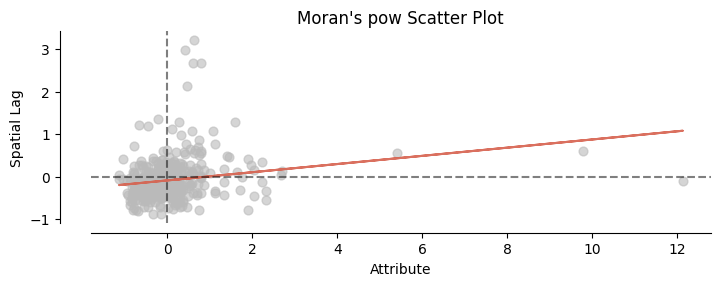

In [416]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_pow, ax=ax)
ax.set_title("Moran's pow Scatter Plot")
plt.show()

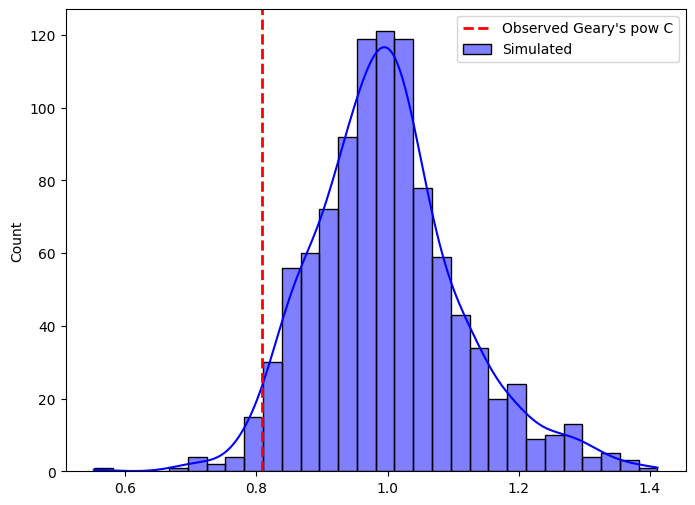

In [417]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_pow.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_pow.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's pow C")
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

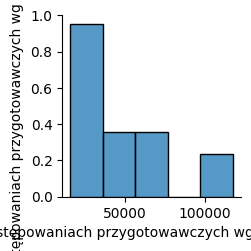

In [418]:
sns.pairplot(woj)
plt.show

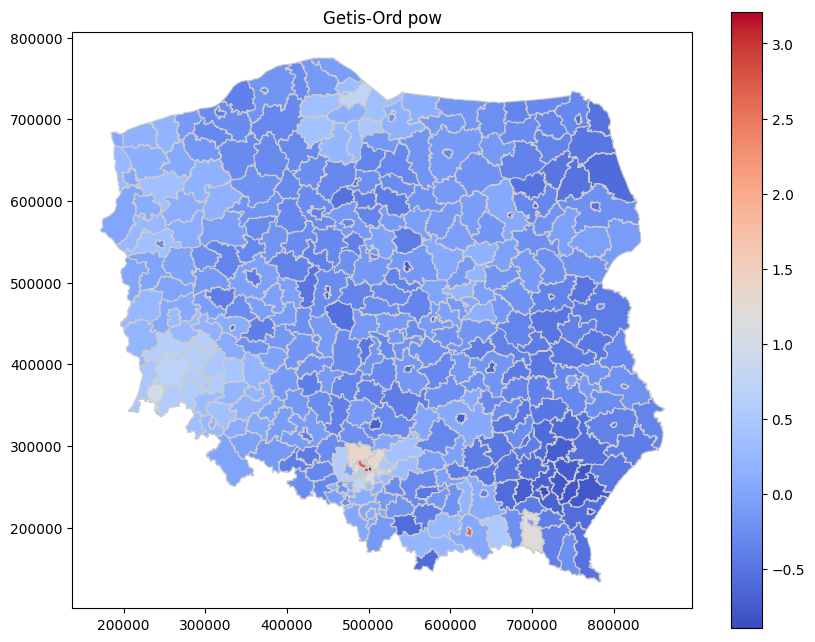

In [419]:
merged_pow['GetisOrd_G_Z'] = g_local_pow.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_pow.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord pow")
plt.show()

#Analizy przy użyciu wag KNN

In [420]:
data_column = 'Przestępstwa_średnia_powiaty'

w_knn = KNN.from_dataframe(merged_pow)

c:\Python310\lib\site-packages\libpysal\weights\distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


In [421]:
y_knn = merged_pow[data_column]
moran_pow_knn = Moran(y_knn, w_knn)
print("Moran's I:", moran_pow_knn.I)          
print("E(I):", moran_pow_knn.EI)              
print("Var(I):", moran_pow_knn.VI_norm)         
print("Z(I):", moran_pow_knn.z_norm)          
print("p-value:", moran_pow_knn.p_norm)       

Moran's I: 0.0649186086234553
E(I): -0.00228310502283105
Var(I): 0.0018529602287949939
Z(I): 1.5611595812311598
p-value: 0.11848610298736469


In [422]:
geary_pow_knn = Geary(y_knn, w_knn)
print("Geary's C:", geary_pow_knn.C)           
print("E(C):", geary_pow_knn.EC)               
print("Var(C):", geary_pow_knn.VC_norm)        
print("Z(C):", geary_pow_knn.z_norm)            
print("p-value:", geary_pow_knn.p_norm)        

Geary's C: 1.1162783263412597
E(C): 1.0
Var(C): 0.002292061628420925
Z(C): 2.428765732389791
p-value: 0.007575159089658151


In [423]:
g_pow_knn = G(y_knn, w_knn)
print("G:", g_pow_knn.G)                       
print("E(G):", g_pow_knn.EG)                   
print("Var(G):", g_pow_knn.VG)             
print("Z(G):", g_pow_knn.z_norm)                
print("p-value:", g_pow_knn.p_norm)             

G: 0.004979931695802312
E(G): 0.0045662100456621
Var(G): 1.6952665054131052e-08
Z(G): 3.177527058348277
p-value: 0.0007426841447580879


In [424]:
g_local_pow_knn = G_Local(y_knn, w_knn)
print("Local G* values:", g_local_pow_knn.Zs)

Local G* values: [-2.78748232e-01  3.43067074e-01 -4.84427695e-02  3.42650499e-01
  4.17206952e-01  9.98466229e-01 -2.42201834e-01 -1.17076438e-01
 -1.42021979e-01 -6.07739414e-01  2.72350045e-01  2.36336233e-01
 -7.80854729e-02 -2.87878391e-01 -4.65538725e-01  1.52451798e-02
  1.03201700e+00 -2.78748232e-01 -4.97309749e-02 -4.84427695e-02
  3.42650499e-01 -5.48337355e-01 -5.60676621e-02 -1.42491183e-01
 -2.08467041e-01 -6.90541605e-01 -6.98314503e-01  6.05276140e-01
 -8.16069825e-01 -2.66394039e-01 -3.99100596e-01  5.32735167e-02
 -1.69785528e-01  5.25967060e-01 -1.15001826e-02 -8.46233898e-01
  8.84294308e-01  5.91901188e-01  8.83413404e-01  1.28351110e-01
  4.42914257e-01  5.08570756e+00  1.00563166e+00  5.11597496e+00
  1.11989156e+00  4.76850074e-01 -2.78128595e-01  5.95306768e-01
 -9.86500856e-02  3.35520354e-02 -4.01173368e-01  9.74200683e-03
  6.25826372e+00 -2.24537737e-01 -3.97800095e-02 -6.64162808e-02
 -1.35377653e-01 -4.48993899e-01 -3.10553772e-01 -8.39560732e-01
 -3.3149

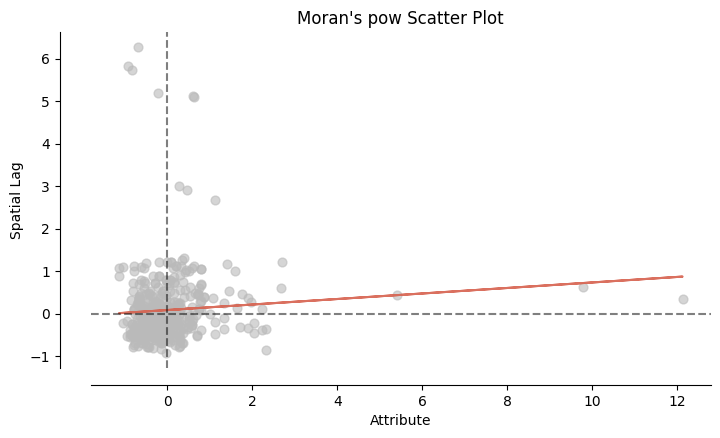

In [425]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_pow_knn, ax=ax)
ax.set_title("Moran's pow Scatter Plot")
plt.show()

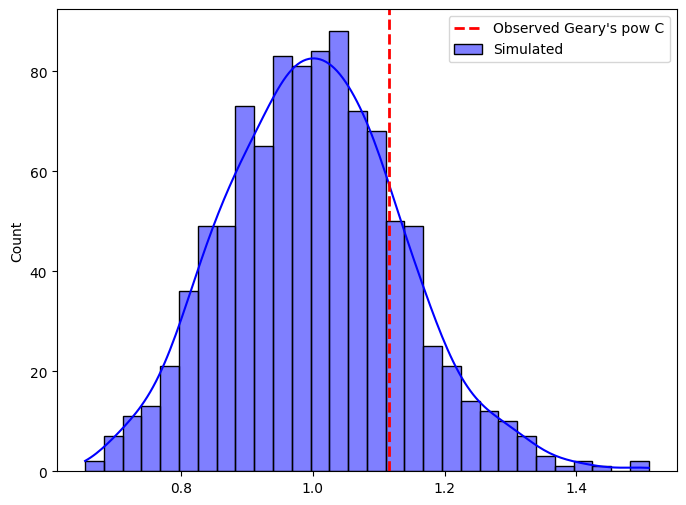

In [426]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_pow_knn.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_pow_knn.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's pow C")
plt.legend()
plt.show()

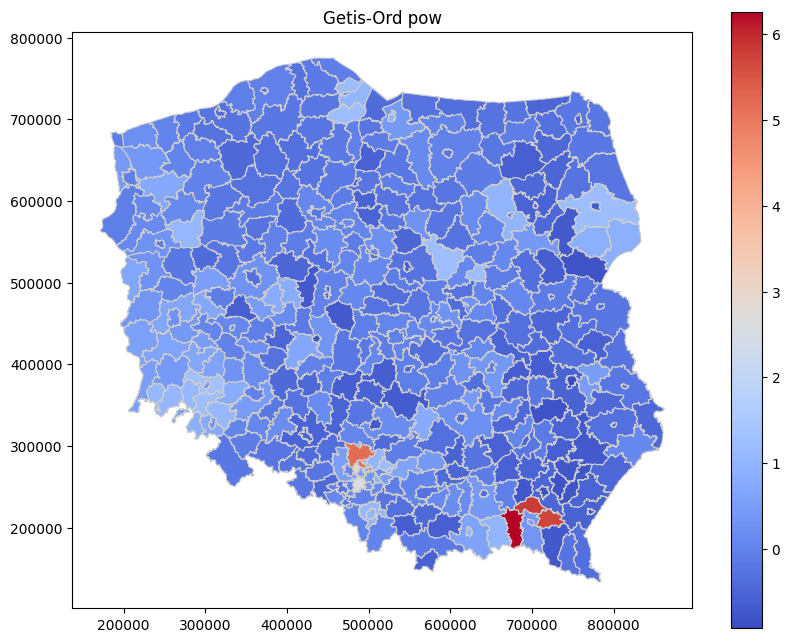

In [427]:
merged_pow['GetisOrd_G_Z'] = g_local_pow_knn.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_pow.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord pow")
plt.show()

#Analizy przy użyciu wag KNN z testami permutacyjnymi

In [428]:
y = merged_pow[data_column]
w = weights.KNN.from_dataframe(merged_pow, k=5)  

moran_pow_knn = Moran(y, w, permutations=1000)
print("Moran's I:", moran_pow_knn.I)          
print("E(I):", moran_pow_knn.EI)              
print("Var(I):", moran_pow_knn.VI_norm)        
print("Z(I):", moran_pow_knn.z_norm)           
print("p-value:", moran_pow_knn.p_norm)         

Moran's I: 0.09157245301929501
E(I): -0.00228310502283105
Var(I): 0.0008082214880628686
Z(I): 3.301374556327043
p-value: 0.0009621234742455478


In [429]:
y = merged_pow[data_column]
w = weights.KNN.from_dataframe(merged_pow, k=5)  

geary_pow_knn= Geary(y, w, permutations=1000)

print("Geary's C:", geary_pow_knn.C)           
print("E(C):", geary_pow_knn.EC)               
print("Var(C):", geary_pow_knn.VC_norm)         
print("Z(C):", geary_pow_knn.z_norm)            
print("p-value:", geary_pow_knn.p_norm)         

Geary's C: 1.0041331430542757
E(C): 1.0
Var(C): 0.0009355087500489409
Z(C): 0.13513147279727755
p-value: 0.44625396334953404


In [430]:
y = merged_pow[data_column]
w = weights.KNN.from_dataframe(merged_pow, k=5)  

g_pow_knn = G(y, w, permutations=1000)
print("G:", g_pow_knn.G)                      
print("E(G):", g_pow_knn.EG)                  
print("Var(G):", g_pow_knn.VG)            
print("Z(G):", g_pow_knn.z_norm)                
print("p-value:", g_pow_knn.p_norm)             

G: 0.012328151042122822
E(G): 0.01141552511415525
Var(G): 3.809968394919393e-08
Z(G): 4.675543657226979
p-value: 1.4658794843525058e-06


#Analizy przy użyciu wag binarnego sąsiedztwa z testami permutacyjnymi

In [431]:
y = merged_pow[data_column]

moran_pow_queen= Moran(y, w, permutations=1000)
print("Moran's I:", moran_pow_queen.I)           
print("E(I):", moran_pow_queen.EI)               
print("Var(I):", moran_pow_queen.VI_norm)         
print("Z(I):", moran_pow_queen.z_norm)            
print("p-value:", moran_pow_queen.p_norm)         

Moran's I: 0.09157245301929501
E(I): -0.00228310502283105
Var(I): 0.0008082214880628686
Z(I): 3.301374556327043
p-value: 0.0009621234742455478


In [432]:
geary_pow_queen = Geary(y, w, permutations=1000)
print("Geary's C:", geary_pow_queen.C)          
print("E(C):", geary_pow_queen.EC)               
print("Var(C):", geary_pow_queen.VC_norm)         
print("Z(C):", geary_pow_queen.z_norm)            
print("p-value:", geary_pow_queen.p_norm)         

Geary's C: 1.0041331430542757
E(C): 1.0
Var(C): 0.0009355087500489409
Z(C): 0.13513147279727755
p-value: 0.44625396334953404


In [433]:
g_pow_queen = G(y, w, permutations=1000)

print("G:", g_pow_queen.G)                       
print("E(G):", g_pow_queen.EG)                   
print("Var(G):", g_pow_queen.VG)            
print("Z(G):", g_pow_queen.z_norm)                
print("p-value:", g_pow_queen.p_norm)             

G: 0.012328151042122822
E(G): 0.01141552511415525
Var(G): 3.809968394919393e-08
Z(G): 4.675543657226979
p-value: 1.4658794843525058e-06
